In [140]:
import json
import os
from collections import OrderedDict
from pprint import pprint
import matplotlib.pyplot as plt

In [141]:
json_dir = os.getcwd() + "/modin/.benchmarks/Darwin-CPython-3.6-64bit/"
master_hash = "ae9f397109620cf00243169654f2f4bec7809b72"

data = []
commit_order = {}
master_data = []
for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        order = int(filename.split("_")[0])
        commit = filename.split("_")[1].split("_")[0]
        if commit == master_hash:
            with open(json_dir + filename) as f:
                master_data.append(json.load(f))
        else:
            commit_order[commit] = order
            with open(json_dir + filename) as f:
                data.append(json.load(f))
            
commit_order = OrderedDict(sorted(commit_order.items(), key=lambda t: t))
commit_order

OrderedDict([('a368735324669914efcd9020ac3c8ffffab9b641', 1)])

In [142]:
def json_parser(data):
    parsed_data = {}
    for commit_data in data:
        commit_hash = commit_data["commit_info"]["id"]
        test_data = {}
        for test in commit_data["benchmarks"]:
            name = test["name"][5:]
            test_data[name] = test["stats"]["mean"]
        parsed_data[commit_hash] = test_data
    return parsed_data
        

pprint(json_parser(master_data))
        
    

{'ae9f397109620cf00243169654f2f4bec7809b72': {'add': 0.044498100550845264,
                                              'add_df': 0.026291887605718028,
                                              'apply': 0.08780498997075484,
                                              'describe': 0.06847132141701877,
                                              'fillna': 0.011862139589290811,
                                              'isna': 0.04086302075302228,
                                              'sum': 0.06263208320403162}}


In [143]:
def plot_function_perf(other_data, func_name):
    commits = [a for a in commit_order]
    perf = [other_data[commit_hash][func_name] for commit_hash in commits]
    commits = [a[:7] for a in commits]
    commits = commits[::-1]
    perf = perf[::-1]
    plt.plot(commits, perf)
    plt.ylabel('seconds')
    plt.xlabel('commit hash')
    plt.title(func_name + ' performance')
    plt.show()

def plot_against_master(other_data, master_data, hash_to_compare, func_name):
    #commits = [a for a in commit_order]
    #perf = [other_data[commit_hash][func_name] for commit_hash in commits]
    #commits = [a[:7] for a in commits]
    #commits = commits[::-1]
    #perf = perf[::-1]
    commits = [hash_to_compare[:7], "master"]
    compare_perf = other_data[hash_to_compare][func_name]
    master_perf = master_data[master_hash][func_name]
    perf = [compare_perf, master_perf]
    #x = ["master"]
    #x.append(commits[0])
    #y = [master_data[master_hash][func_name]]
    #y.append(perf[0])
    print(commits)
    print(perf)
    plt.plot(commits, perf)
    plt.ylabel('seconds')
    plt.xlabel('commit hash')
    plt.title(func_name + ' performance')
    plt.show()

['a368735', 'master']
[0.04610124307218939, 0.044498100550845264]


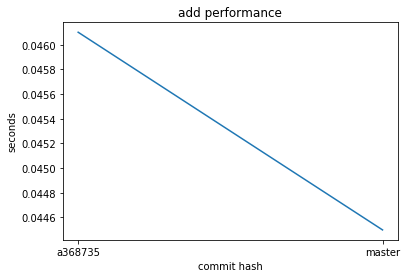

In [145]:
#RUN
other = json_parser(data)
#plot_function_perf(other, 'add')
hash_to_compare = 'a368735324669914efcd9020ac3c8ffffab9b641'
master = json_parser(master_data)
plot_against_master(other, master, hash_to_compare, 'add')